frequency: 0.2
frequency: 0.2035
frequency: 0.207
frequency: 0.2105
frequency: 0.214
frequency: 0.2175
frequency: 0.221
frequency: 0.2245
frequency: 0.228
frequency: 0.2315
frequency: 0.235
frequency: 0.2385
frequency: 0.242
frequency: 0.2455
frequency: 0.249
frequency: 0.2525
frequency: 0.256
frequency: 0.2595
frequency: 0.263
frequency: 0.2665
frequency: 0.27
frequency: 0.2735
frequency: 0.277
frequency: 0.2805
frequency: 0.284
frequency: 0.2875
frequency: 0.291
frequency: 0.2945
frequency: 0.298
frequency: 0.3015
frequency: 0.305
frequency: 0.3085
frequency: 0.312
frequency: 0.3155
frequency: 0.319
frequency: 0.3225
frequency: 0.326
frequency: 0.3295
frequency: 0.333
frequency: 0.3365
frequency: 0.34
frequency: 0.3435
frequency: 0.347
frequency: 0.3505
frequency: 0.354
frequency: 0.3575
frequency: 0.361
frequency: 0.3645
frequency: 0.368
frequency: 0.3715
frequency: 0.375
frequency: 0.3785
frequency: 0.382
frequency: 0.3855
frequency: 0.389
frequency: 0.3925
frequency: 0.396
frequen

Text(0, 0.5, 'transmission')

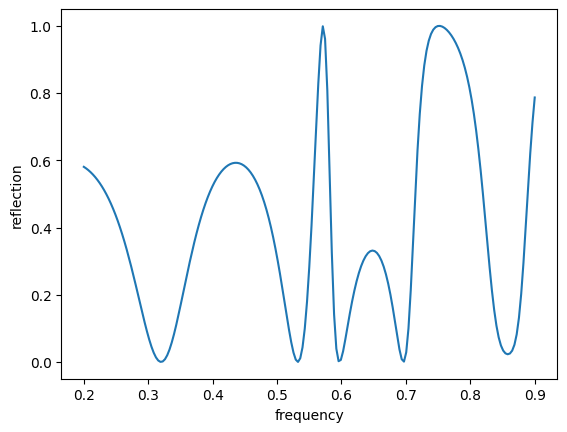

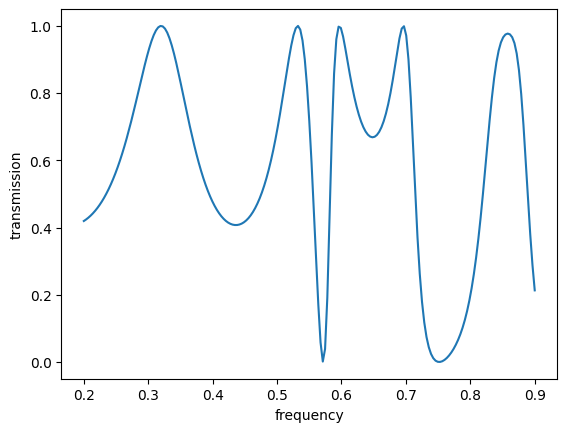

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""
Dielectric array, with permittivity 12.
Period is 1
Each rod has side length 0.55.

 → x
↓z    ___     ___
...  |   |   |   |  ...  (side view)
      ¯¯¯     ¯¯¯
"""

from inkstone import Inkstone
import numpy as np

s = Inkstone()
s.lattice = 1
s.num_g = 30

s.AddMaterial(name='di', epsilon=12)

s.AddLayer(name='in', thickness=0, material_background='vacuum')
d = 0.55
s.AddLayer(name='slab', thickness=d, material_background='di')
s.AddLayerCopy(name='out', original_layer='in', thickness=0)

s.AddPattern1D(layer='slab', pattern_name='box', material='vacuum', width=0.45, center=0.5)

s.SetExcitation(theta=0, phi=0, s_amplitude=1, p_amplitude=0)

I = []
R = []
T = []
freq = np.linspace(0.2, 0.9, 201)
for f in freq:
    s.frequency = f
    i, r = s.GetPowerFlux('in')
    I.append(i)
    R.append(-r / i)
    T.append(s.GetPowerFlux('out')[0] / i)
    print("frequency: {:g}".format(f))

#%% plotting
from matplotlib import pyplot as plt

plt.figure()
plt.plot(freq, R)
plt.xlabel('frequency')
plt.ylabel('reflection')
plt.figure()
plt.plot(freq, T)
plt.xlabel('frequency')
plt.ylabel('transmission')